# **1. Initial Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('./churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
df.describe(exclude='O')

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isna().mean()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
columns = df.columns

In [10]:
for col in columns:
    print(f'{df[col].value_counts()}\nColumn dtype: {df[col].dtype}\n' + 50 * '*' + '\n')

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
4501-VCPFK    1
6075-SLNIL    1
             ..
1452-KIOVK    1
6713-OKOMC    1
7892-POOKP    1
6388-TABGU    1
9763-GRSKD    1
Name: count, Length: 7043, dtype: int64
Column dtype: object
**************************************************

gender
Male      3555
Female    3488
Name: count, dtype: int64
Column dtype: object
**************************************************

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Column dtype: int64
**************************************************

Partner
No     3641
Yes    3402
Name: count, dtype: int64
Column dtype: object
**************************************************

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Column dtype: object
**************************************************

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
Column dtype

In [11]:
df = df.drop('customerID', axis=1)

In [12]:
def object_converter(val):
    return 'Yes' if val == 1 else 'No'

df['SeniorCitizen'] = df['SeniorCitizen'].apply(object_converter)

In [13]:
def float_converter(val):
    try:
        return float(val)
    except:
        if val in [' ', '']:
            return 0.0
        return np.nan
    
df['TotalCharges'] = df['TotalCharges'].apply(float_converter)

In [14]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [15]:
numerical_columns = df.select_dtypes(exclude='object').columns.tolist()
numerical_columns

['tenure', 'MonthlyCharges', 'TotalCharges']

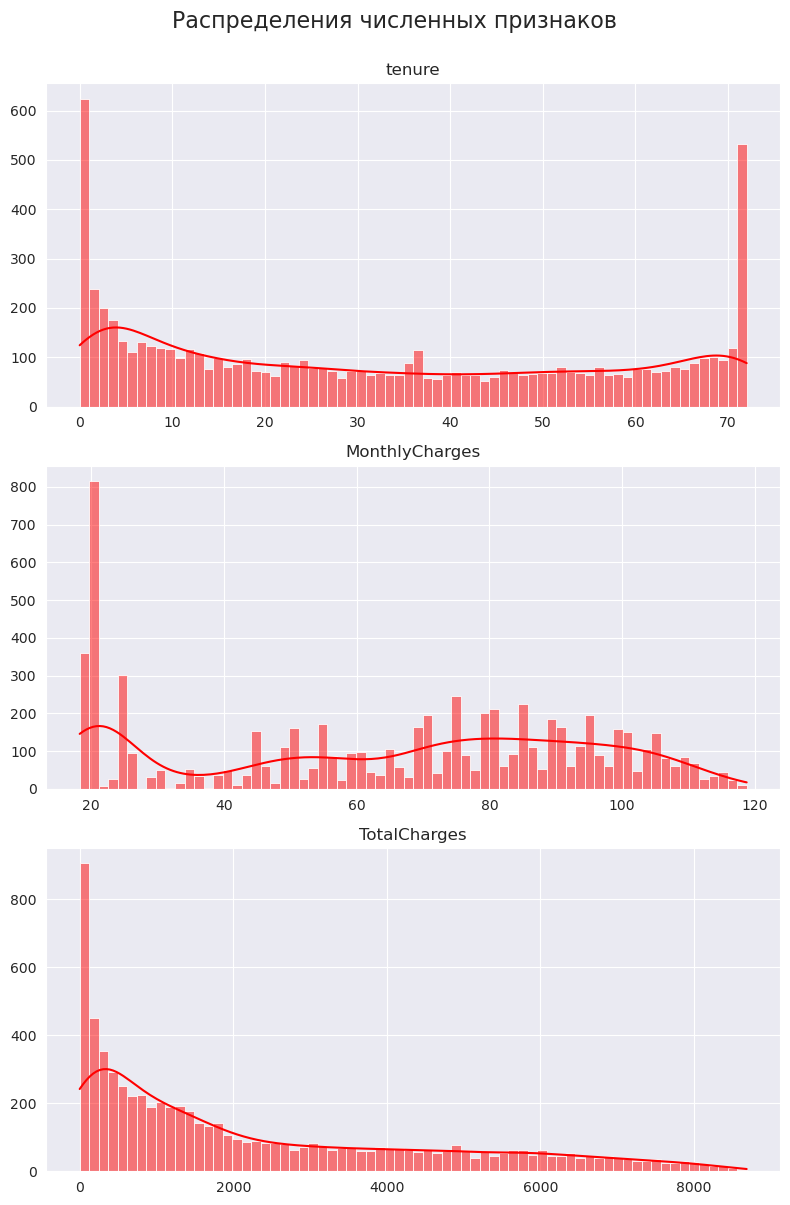

In [16]:
plt.figure(figsize=(8, 12))
for i, col in enumerate(numerical_columns):
  plt.subplot(len(numerical_columns), 1, i+1)
  sns.histplot(data=df, x=col, kde=True, bins=70, color='red')
  plt.xlabel(None)
  plt.ylabel(None)
  plt.title(col)

plt.subplots_adjust(hspace=0.6)
plt.suptitle('Распределения численных признаков', fontsize=16, y=1)
plt.tight_layout();

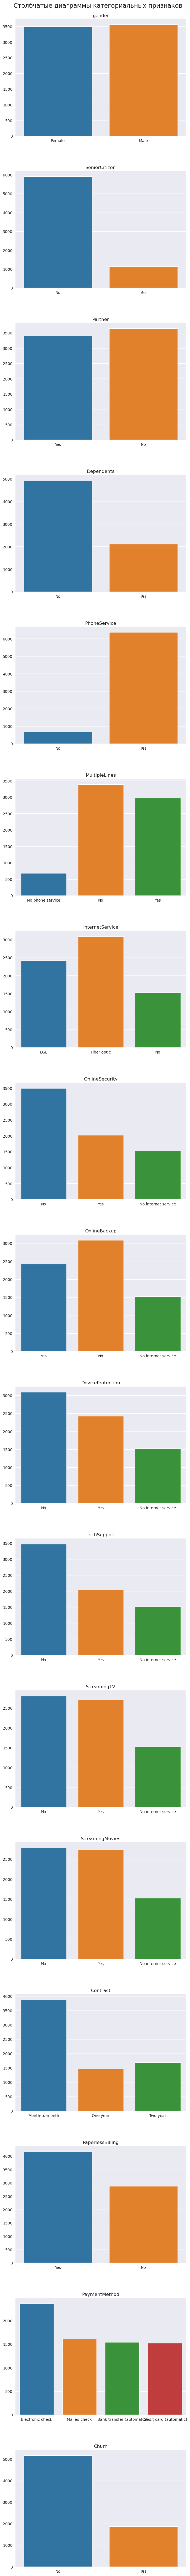

In [17]:
plt.figure(figsize=(8, 120))
for i, col in enumerate(categorical_columns):
  plt.subplot(len(categorical_columns), 1, i+1)
  sns.countplot(data=df, x=col, hue=col)
  plt.xlabel(None)
  plt.ylabel(None)
  plt.title(col)

plt.subplots_adjust(hspace=0.3)
plt.suptitle('Столбчатые диаграммы категориальных признаков', fontsize=16, y=0.885);

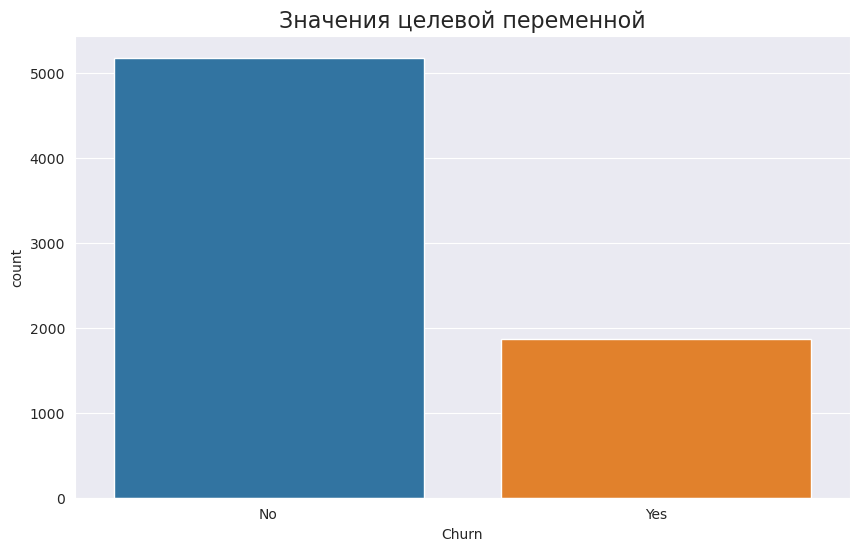

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='Churn')
plt.title('Значения целевой переменной', fontsize=16);

# **2. Data Splitting and Data Encoding**

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.describe(include='O')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [24]:
for col in categorical_columns:
    print(df[col].value_counts())
    print('*' * 40)

gender
Male      3555
Female    3488
Name: count, dtype: int64
****************************************
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64
****************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
****************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
****************************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
****************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
****************************************
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
****************************************
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
****************************************
OnlineBackup
No      

In [25]:
binary_cols = [col for col in X_train.columns if df[col].dtype == 'O' and X_train[col].nunique() == 2]
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling']

In [26]:
multi_cols = [col for col in X_train.columns if df[col].dtype == 'O' and col not in binary_cols]
multi_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [27]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', OrdinalEncoder(), binary_cols),
        ('multi', OneHotEncoder(drop='first', handle_unknown='ignore'), multi_cols),
        ('num', RobustScaler(), numerical_columns)
    ]
)

In [28]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_test_scaled = preprocessor.transform(X_test)

In [29]:
y_train = y_train.map({'No': 0, 'Yes': 1})
y_val = y_val.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

In [30]:
multi_cols_encoded = preprocessor.named_transformers_['multi'].get_feature_names_out(multi_cols)

In [32]:
all_cols = list(binary_cols) + list(multi_cols_encoded) + list(numerical_columns)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=all_cols)
y_train_series = pd.Series(y_train.values, name='target')
df_for_corr = pd.concat([X_train_scaled_df, y_train_series], axis=1)

In [33]:
df_for_corr.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,target
gender,1.000000,0.020463,-0.009109,0.017425,0.001969,-0.016152,-0.001969,-0.015376,-0.009135,0.011216,...,-0.025170,0.008920,-0.030100,-0.000517,-0.000193,0.011390,-0.016340,-0.021155,-0.019191,0.006034
SeniorCitizen,0.020463,1.000000,0.015390,-0.215550,0.004606,0.157434,-0.004606,0.136325,0.248580,-0.180257,...,0.108486,-0.052855,-0.112285,-0.026497,0.169619,-0.146978,0.017930,0.212159,0.099827,0.144064
Partner,-0.009109,0.015390,1.000000,0.437038,0.024369,-0.023346,-0.024369,0.153388,0.002514,0.010742,...,0.115852,0.076243,0.249349,0.062621,-0.079459,-0.094991,0.370571,0.092883,0.309153,-0.148327
Dependents,0.017425,-0.215550,0.437038,1.000000,0.001339,-0.120007,-0.001339,-0.015858,-0.169554,0.154102,...,-0.048036,0.058507,0.207699,0.052876,-0.154679,0.057222,0.144588,-0.124455,0.050037,-0.170064
PhoneService,0.001969,0.004606,0.024369,0.001339,1.000000,0.003836,-1.000000,0.283914,0.296057,0.175586,...,-0.043008,-0.010272,0.003122,-0.008146,0.000930,-0.004675,-0.002055,0.247104,0.109310,0.021185
PaperlessBilling,-0.016152,0.157434,-0.023346,-0.120007,0.003836,1.000000,-0.003836,0.157405,0.328978,-0.327082,...,0.215343,-0.060899,-0.146317,-0.037271,0.220627,-0.203707,0.005949,0.352849,0.155982,0.207377
MultipleLines_No phone service,-0.001969,-0.004606,-0.024369,-0.001339,-1.000000,-0.003836,1.000000,-0.283914,-0.296057,-0.175586,...,0.043008,0.010272,-0.003122,0.008146,-0.000930,0.004675,0.002055,-0.247104,-0.109310,-0.021185
MultipleLines_Yes,-0.015376,0.136325,0.153388,-0.015858,0.283914,0.157405,-0.283914,1.000000,0.366458,-0.205680,...,0.260217,-0.001041,0.110364,0.055123,0.083915,-0.230604,0.334522,0.489714,0.470492,0.046509
InternetService_Fiber optic,-0.009135,0.248580,0.002514,-0.169554,0.296057,0.328978,-0.296057,0.366458,1.000000,-0.472073,...,0.321916,-0.072664,-0.219769,-0.049986,0.334719,-0.306697,0.031710,0.790971,0.370969,0.311279
InternetService_No,0.011216,-0.180257,0.010742,0.154102,0.175586,-0.327082,-0.175586,-0.205680,-0.472073,1.000000,...,-0.422895,0.038632,0.219413,0.012317,-0.298959,0.323963,-0.051130,-0.764450,-0.379717,-0.235568


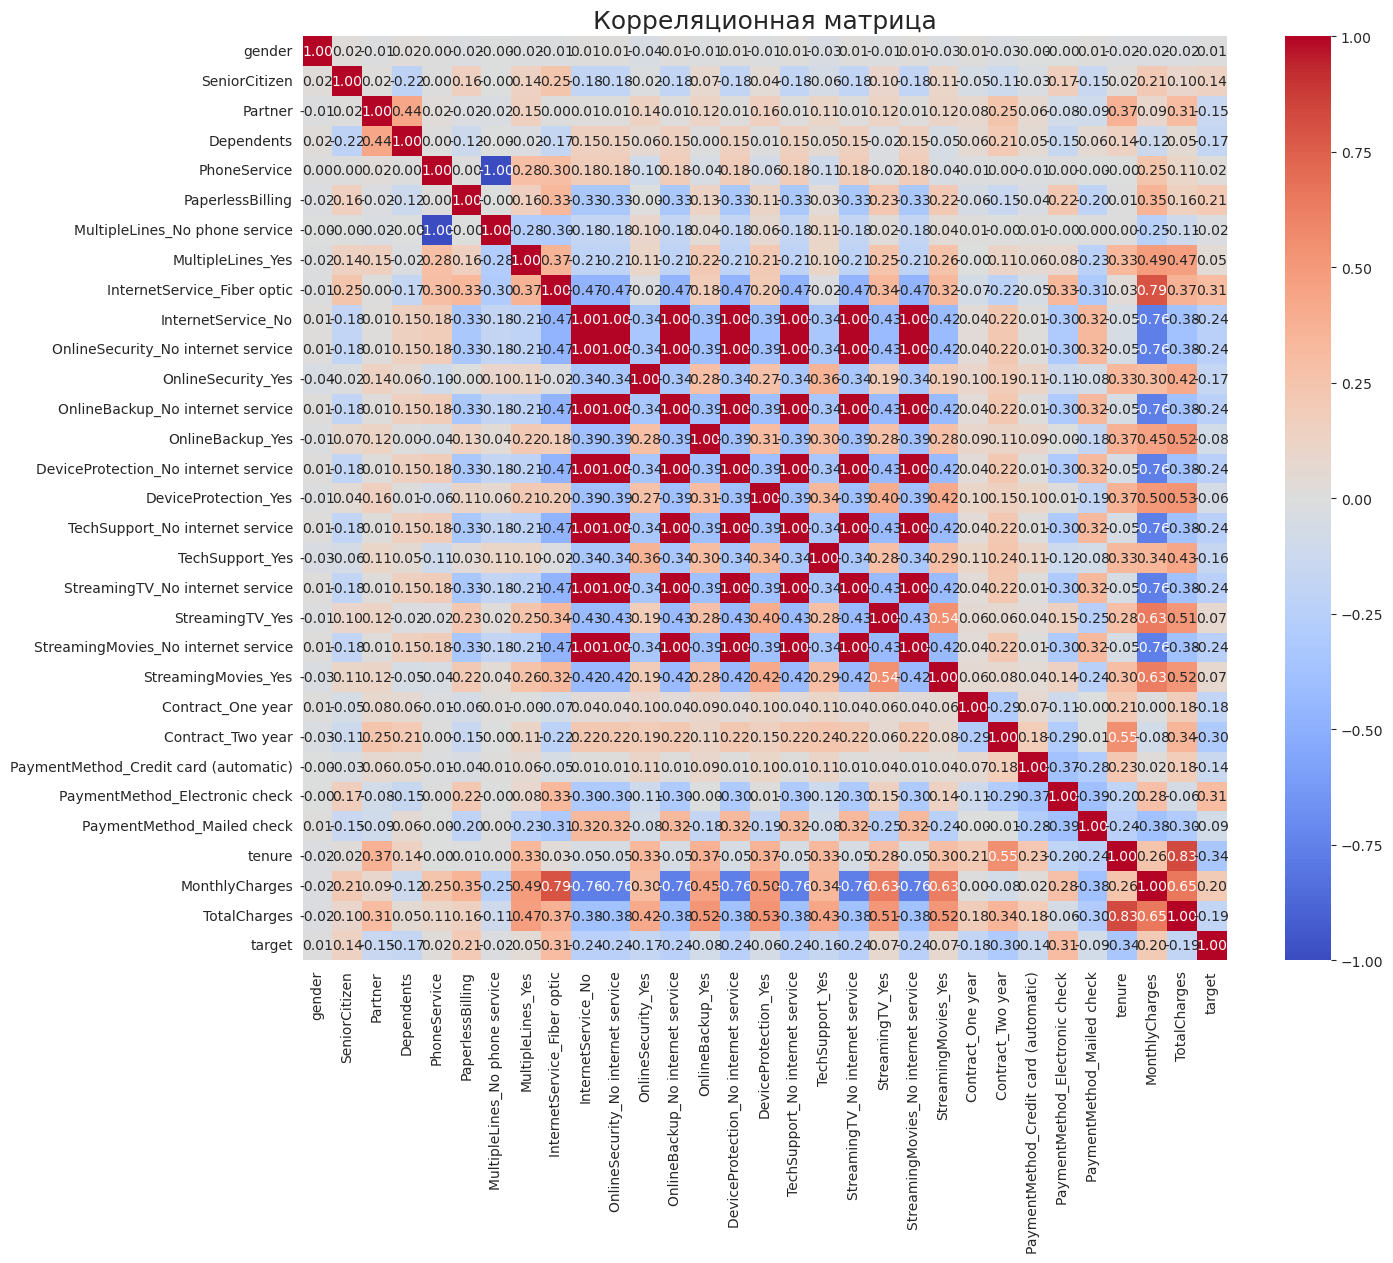

In [34]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_for_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Корреляционная матрица', fontsize=18);

In [41]:
df_for_corr.corr()['InternetService_No'][:-1].abs().sort_values()

Partner                                  0.010742
gender                                   0.011216
PaymentMethod_Credit card (automatic)    0.012317
Contract_One year                        0.038632
tenure                                   0.051130
Dependents                               0.154102
PhoneService                             0.175586
MultipleLines_No phone service           0.175586
SeniorCitizen                            0.180257
MultipleLines_Yes                        0.205680
Contract_Two year                        0.219413
PaymentMethod_Electronic check           0.298959
PaymentMethod_Mailed check               0.323963
PaperlessBilling                         0.327082
OnlineSecurity_Yes                       0.336911
TechSupport_Yes                          0.341788
TotalCharges                             0.379717
DeviceProtection_Yes                     0.386053
OnlineBackup_Yes                         0.386775
StreamingMovies_Yes                      0.422895


In [35]:
corr = df_for_corr.corr()['target'][:-1].abs().sort_values()
corr

gender                                   0.006034
MultipleLines_No phone service           0.021185
PhoneService                             0.021185
MultipleLines_Yes                        0.046509
DeviceProtection_Yes                     0.057403
StreamingMovies_Yes                      0.071845
StreamingTV_Yes                          0.074709
OnlineBackup_Yes                         0.081615
PaymentMethod_Mailed check               0.085510
PaymentMethod_Credit card (automatic)    0.139554
SeniorCitizen                            0.144064
Partner                                  0.148327
TechSupport_Yes                          0.162827
OnlineSecurity_Yes                       0.166529
Dependents                               0.170064
Contract_One year                        0.183329
TotalCharges                             0.187241
MonthlyCharges                           0.202999
PaperlessBilling                         0.207377
TechSupport_No internet service          0.235568


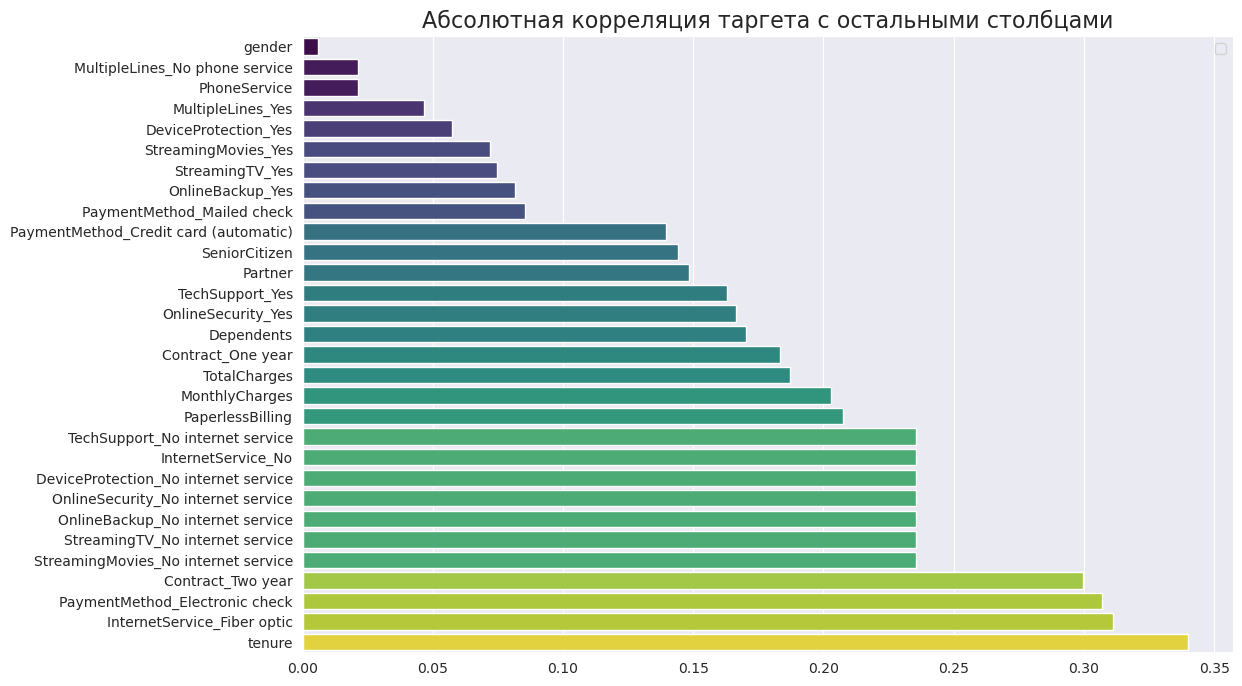

In [36]:
plt.figure(figsize=(12, 8))
sns.barplot(x=corr.values, y=corr.index, hue=corr.values, palette='viridis')
plt.legend([])
plt.title('Абсолютная корреляция таргета с остальными столбцами', fontsize=16)
plt.ylabel(None);

In [42]:
#1) Удалить коррелирующие
#2) PCA

# **3. Model Training**